__реализация полиномиальной регрессии с помощью PyTorch__

Евгений Борисов esborisov@sevsu.ru

In [1]:
# https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

In [2]:
import numpy as np
from numpy import random as rng
import math

from matplotlib import pyplot as plt 

import torch

In [3]:
# генерируем данные, пакуем их в тензоры Torch
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

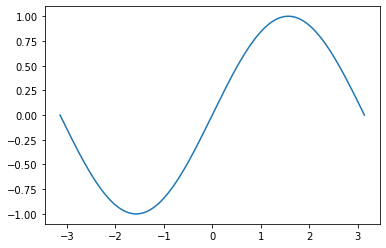

In [4]:
plt.plot(x,y)

---

$$
y = 
a + b x + c x^2 + d x^3 =
\begin{bmatrix} 1 & x & x^2 & x^3 \end{bmatrix} \cdot 
\begin{bmatrix} a \cr b \cr c \cr d \end{bmatrix} 
$$

In [5]:
# строим модель
class Polynomial3(torch.nn.Module):
    
    # инициализируем составные части модели
    def __init__(self,p=3):
        super().__init__()
        self.linear = torch.nn.Linear(p, 1) # линейное преобразование
        self.flatten = torch.nn.Flatten(0,1) # убираем лишние размерности
        # параметры polynomial_features [1,2,3,...]
        self.pow = torch.tensor( list(range(1,p+1)), requires_grad=False) 
            
    # дополнительная функция,
    #  преобразуем денные, добавляем столбцы в матрицу датасета            
    def polynomial_features(self,x):
         # tensor (x, x^2, x^3).
        return x.unsqueeze(-1).pow( self.pow )

    # прямой проход, алгоритм вычисления выхода модели
    def forward(self, x):
        out = self.polynomial_features(x)
        out = self.linear( out)
        out = self.flatten(out)
        return out


In [6]:
# создаём модель
model = Polynomial3()

In [7]:
criterion = torch.nn.MSELoss(reduction='sum') # функция потери
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6) # метод оптимизации

In [8]:
%%time

err_hist = [] # история изменения значений функции потери

# цикл обучения 
for t in range(2000):
    y_pred = model(x) # вычисляем выход
    loss = criterion(y_pred, y) # вычисляем потерю
    err_hist.append( loss.item() )   
    optimizer.zero_grad() # очищаем предыдущее значение градиента
    loss.backward()  # вычисляем текущее значение градиента ф-ции потери
    optimizer.step() # изменение параметров

KeyboardInterrupt: 

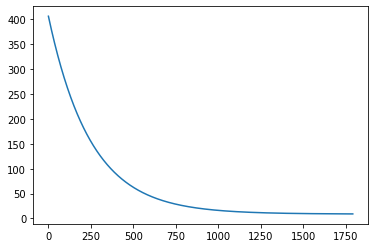

In [9]:
plt.plot(err_hist[100:])

----

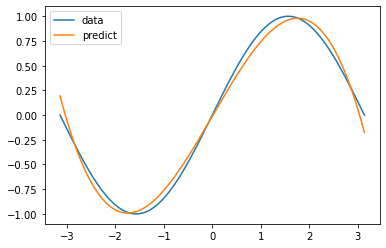

In [10]:
# проверяем результат

# выключаем расчёт градиентов
with torch.set_grad_enabled(False):
    y_pred = model(x) # вычисляем значения регресии

# рисуем результат    
plt.plot(x,y,label='data')
plt.plot(x,y_pred,label='predict')
plt.legend()

In [11]:
# from torchsummary import summary
# summary(model.to('cuda:0'),(1,4))